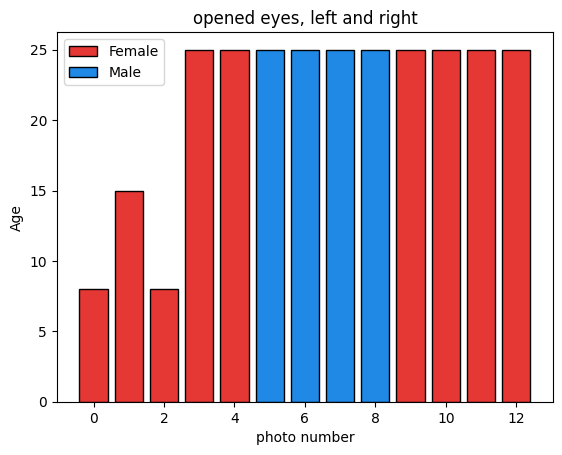

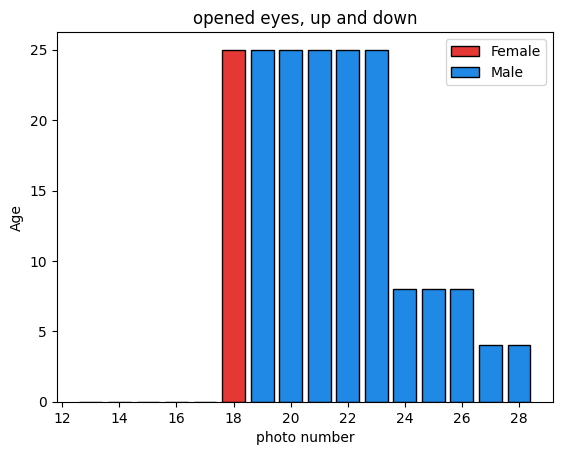

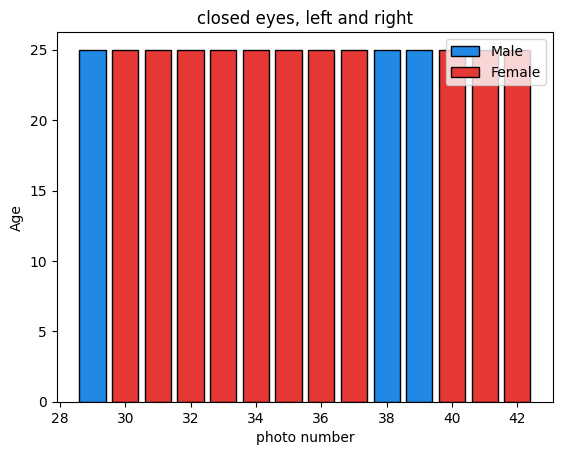

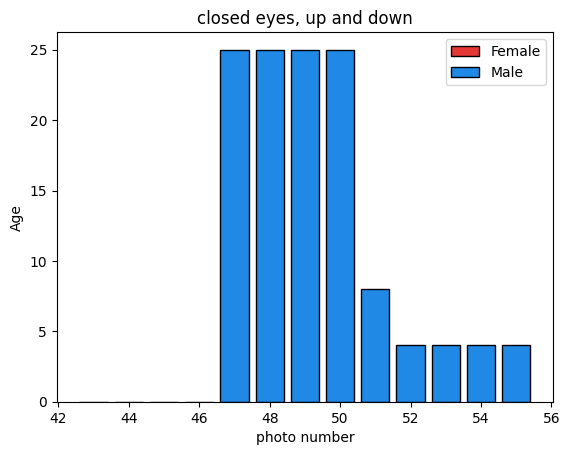

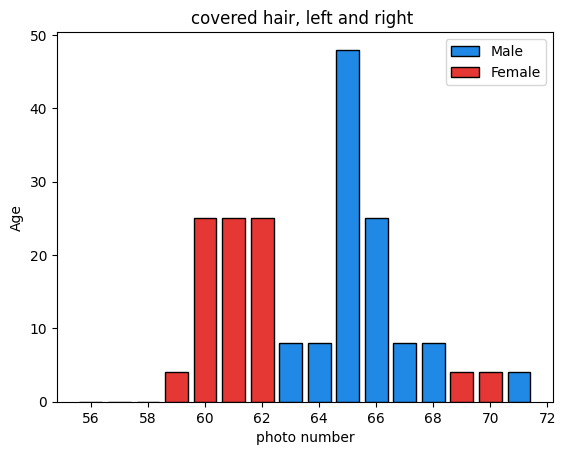

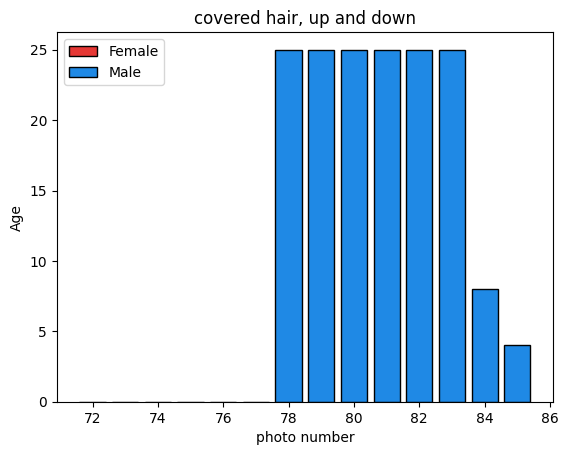

In [1]:
import matplotlib.pyplot as plt
import csv

def main():
    photoNum = 0 #사진번호, 00~12(눈 뜨고 좌우로 이동) / 13~28(눈 뜨고 상하로 이동) / 29~42 (눈 감고 좌우로 이동) / 43~55 (눈 감고 상하로 이동) / 56~71 (머리 덮고 좌우로 이동) / 72~85 (머리 덮고 상하로 이동)
    ageGroup = [[], [], [], [], [], [], []]
    genderGroup = [[], [], [], [], [], []]
    xlines = [[], [], [], [], [], []]
    f = open('KJHResult.csv')
    data = csv.reader(f)
    header = next(data)
    
    for row in data:
        if len(row[1]) != 0:
            if row[1] == 'Male':
                row[1] = True
            else:
                row[1] = False
                
            row[2] = float(row[2])
        else: #face detection failed
            row[1] = False
            row[2] = 0
            
        if photoNum >= 0 and photoNum <= 12:
            genderGroup[0].append(row[1])
            ageGroup[0].append(row[2])
            xlines[0].append(photoNum)
            
        elif photoNum >= 13 and photoNum <= 28:
            genderGroup[1].append(row[1])
            ageGroup[1].append(row[2])
            xlines[1].append(photoNum)
        
        elif photoNum >= 29 and photoNum <= 42:
            genderGroup[2].append(row[1])
            ageGroup[2].append(row[2])
            xlines[2].append(photoNum)
        
        elif photoNum >= 43 and photoNum <= 55:
            genderGroup[3].append(row[1])
            ageGroup[3].append(row[2])
            xlines[3].append(photoNum)
        
        elif photoNum >= 56 and photoNum <= 71:
            genderGroup[4].append(row[1])
            ageGroup[4].append(row[2])
            xlines[4].append(photoNum)
        
        elif photoNum >= 72 and photoNum <= 85:
            genderGroup[5].append(row[1])
            ageGroup[5].append(row[2])
            xlines[5].append(photoNum)
                
        photoNum += 1
    
    f.close()
    
    for i in range(6):
        if i == 0:
            plt.title("opened eyes, left and right")
        elif i == 1:
            plt.title("opened eyes, up and down")
        elif i == 2:
            plt.title("closed eyes, left and right")
        elif i == 3:
            plt.title("closed eyes, up and down")
        elif i == 4:
            plt.title("covered hair, left and right ")
        elif i == 5:
            plt.title("covered hair, up and down")
        
        male_added = False
        female_added = False
        
        for j in range(len(ageGroup[i])):
            if genderGroup[i][j]:
                if not male_added:
                    plt.bar(xlines[i][j], ageGroup[i][j], color='#1f89e5', label='Male', edgecolor='black')
                    male_added = True
                else:
                    plt.bar(xlines[i][j], ageGroup[i][j], color='#1f89e5', edgecolor='black')
            else:
                if not female_added:
                    plt.bar(xlines[i][j], ageGroup[i][j], color='#e53734', label='Female', edgecolor='black')
                    female_added = True
                else:
                    plt.bar(xlines[i][j], ageGroup[i][j], color='#e53734', edgecolor='black')

        plt.xlabel('photo number')
        plt.ylabel('Age')
        
        plt.legend()
        plt.show()

if __name__ == "__main__":
    main()